In [1]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [2]:
#import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Divide the dataset into independent and dependent features

X = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
# FE
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
## concat variable to dataframe
X.drop(labels=['Geography','Gender'],axis=1,inplace=True)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X = pd.concat([X,geography,gender],axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape

(8000, 11)

In [18]:
#part 2 Now lets create ANN

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout


In [20]:
### Initialize the ANN
classifier = Sequential()

In [21]:
classifier.add(Dense(units=11,activation='relu'))

In [22]:
## adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [23]:
## adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [24]:
## adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [28]:
#compliing
#classifier.compile(optimizer='adam',loss='binary_cross_entropy',metrics=['accuracy'])

In [32]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [33]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
#Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [37]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3282 - accuracy: 0.8664 - val_loss: 0.3702 - val_accuracy: 0.8516
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3295 - accuracy: 0.8664 - val_loss: 0.3653 - val_accuracy: 0.8474
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3281 - accuracy: 0.8651 - val_loss: 0.3803 - val_accuracy: 0.8497
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3276 - accuracy: 0.8666 - val_loss: 0.3710 - val_accuracy: 0.8440
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3273 - accuracy: 0.8627 - val_loss: 0.3720 - val_accuracy: 0.8466
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3282 - accuracy: 0.8647 - val_loss: 0.3883 - val_accuracy: 0.8512
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3283 - accuracy: 0.8638 - val_loss: 0.3747 - val_accuracy:

In [38]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

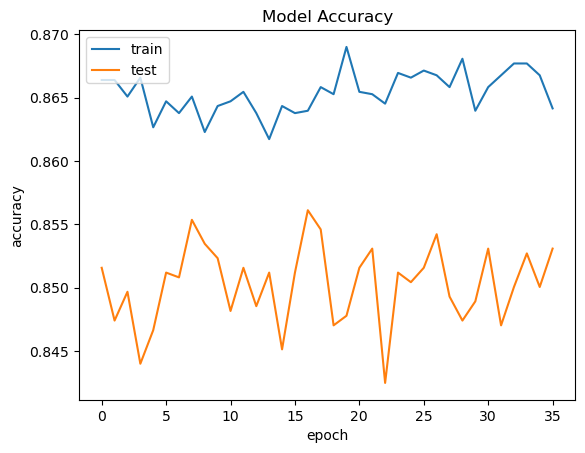

In [39]:
# summary history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [40]:
#part 3 making predictions and evaluting the model

# predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 3ms/step


In [41]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1501,   94],
       [ 192,  213]], dtype=int64)

In [42]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [43]:
score

0.857

In [44]:
## get the weights
classifier.get_weights()

[array([[-0.22448678, -0.23836651,  0.40821505, -0.71182376,  1.278584  ,
          0.14525482,  1.0716711 , -0.38975835, -0.158068  , -0.69683135,
         -1.6368437 ],
        [-3.0201585 ,  0.5200214 , -4.8106084 , -2.83761   , -0.82636136,
         -1.8294958 ,  0.945185  ,  3.0851977 ,  2.002484  ,  1.6593574 ,
         -0.5538133 ],
        [-0.2409902 , -0.0992681 , -0.48996595,  0.23857673,  0.3101267 ,
          1.8092425 ,  1.1099412 , -0.20515488, -0.0273456 , -2.4836    ,
          1.7198004 ],
        [-1.2042298 ,  1.4936801 , -2.217012  , -1.154385  , -1.0913559 ,
         -1.7324221 , -0.21624011, -0.61722994, -1.7461162 , -0.8771837 ,
         -2.3119338 ],
        [ 0.7110449 ,  3.4714184 ,  1.025539  , -1.6990361 , -0.40090555,
         -0.51589674,  4.0374537 ,  0.3876739 , -4.5240936 , -1.0804462 ,
         -0.32424238],
        [-0.3961932 , -0.42808408,  0.6432749 ,  0.28471136,  1.3466582 ,
         -2.0589848 , -0.31795397, -0.21772549, -0.5930054 , -0.1979935

In [ ]:
s